In [1]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
import statsmodels.api as sm
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#weighted nSBM weighted model
w_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_wMARSseq_l1.pkl','rb'))
#weighted nSBM flat model
w_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_wMARSseq_l1.pkl','rb'))
#unweighted nSBM weighted model
unw_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_MARSseq_l1.pkl','rb'))
unw_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_MARSseq_l2.pkl','rb'))
#unweighted nSBM flat model
unw_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_MARSseq_l1.pkl','rb'))
unw_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_MARSseq_l2.pkl','rb'))

In [15]:
# weighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/MARSseq_minimize_weighted')
#weight model
weighted_w_info_l1=load('cell_affinity_significance/wMARSseq_weighted_level_1.npz')
weighted_w_info_l2=load('cell_affinity_significance/wMARSseq_weighted_level_2.npz')
weighted_w_info_l3=load('cell_affinity_significance/wMARSseq_weighted_level_3.npz')
#flat model
weighted_f_info_l1=load('cell_affinity_significance/wMARSseq_weighted_level_1.npz')
weighted_f_info_l2=load('cell_affinity_significance/wMARSseq_weighted_level_2.npz')
weighted_f_info_l3=load('cell_affinity_significance/wMARSseq_weighted_level_3.npz')

In [16]:
# unweighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/MARSseq_minimize')
#weight model
unweighted_w_info_l1=load('cell_affinity_significance/MARSseq_weighted_level_1.npz')
unweighted_w_info_l2=load('cell_affinity_significance/MARSseq_weighted_level_2.npz')
unweighted_w_info_l3=load('cell_affinity_significance/MARSseq_weighted_level_3.npz')
#flat model
unweighted_f_info_l1=load('cell_affinity_significance/MARSseq_weighted_level_1.npz')
unweighted_f_info_l2=load('cell_affinity_significance/MARSseq_weighted_level_2.npz')
unweighted_f_info_l3=load('cell_affinity_significance/MARSseq_weighted_level_3.npz')

In [7]:
markers=pd.read_excel("markers_hca.ods", engine="odf",header=2,index_col=None)

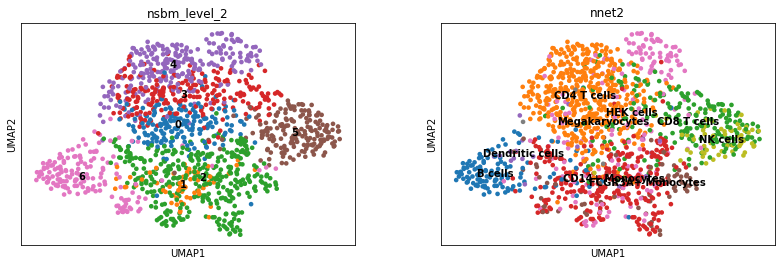

In [3]:
sc.pl.umap(adata,color=['nsbm_level_2','nnet2'],legend_loc ='on data')

In [21]:
significative=0    
for group in adata.obs.nsbm_level_2.cat.categories:
    sig_level=len([x for x in w_pvals_l2[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

6157


In [4]:
np.sum(f_padj_l2<1e-2,axis=0)

array([  8,  28, 440,  26, 376,  81,  66])

In [5]:
np.sum(w_padj_l2<1e-2,axis=0)

array([  8,  15, 454,  23, 372,  88,  68])

# 1) Number of genes
### flat model

In [ ]:
w=weighted_w_info_l1
f=weighted_f_info_l1
w_pvals=w['pvals']
w_fdr=w['fdr']
w_scores=w['scores']
f_pvals=f['pvals']
f_fdr=f['fdr']
f_scores=f['scores']

(array([799., 380., 384., 328., 372., 360., 351., 348., 352., 350., 380.,
        375., 365., 353., 290., 273., 303., 351., 406.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

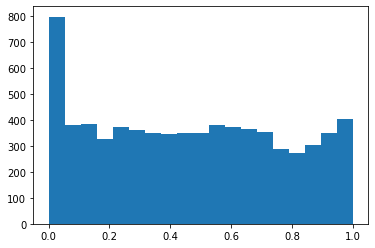

In [13]:
hist(f_padj_l2[:,4],bins=np.linspace(0,1,20))

### weighted model


(array([811., 349., 377., 336., 376., 369., 323., 375., 373., 324., 359.,
        412., 292., 314., 353., 300., 263., 372., 442.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

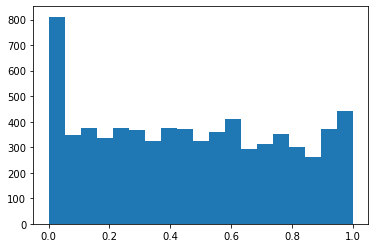

In [12]:
hist(w_padj_l2[:,4],bins=np.linspace(0,1,20))

### scanpy

In [7]:
sc.tl.rank_genes_groups(adatam,groupby='nsbm_level_2',n_genes=-1)

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


(array([274., 195., 205., 236., 272., 236., 294., 302., 350., 380., 394.,
        542., 487., 464., 466., 435., 478., 486., 623.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

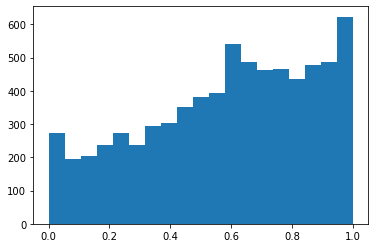

In [11]:
hist([adatam.uns['rank_genes_groups']['pvals_adj'][x][4] for x in range(7119)],bins=np.linspace(0,1,20))

# 2) Markers

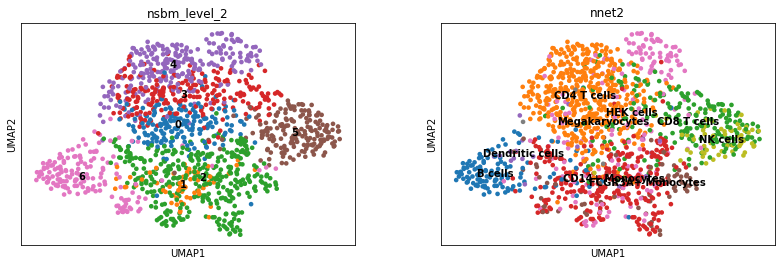

nnet2,B cells,CD4 T cells,CD8 T cells,CD14+ Monocytes,Dendritic cells,FCGR3A+ Monocytes,HEK cells,Megakaryocytes,NK cells
nsbm_level_2,,,,,,,,,
0,2,121,24,6,1,1,21,0,1
1,11,4,5,24,0,7,7,0,0
2,6,19,9,207,5,63,44,2,2
3,3,143,42,3,1,0,29,2,0
4,0,174,12,2,2,0,60,1,0
5,0,0,111,0,0,0,5,0,62
6,104,2,0,25,9,13,4,0,0


In [12]:
sc.pl.umap(adata, color=['nsbm_level_2','nnet2'],legend_loc='on data')
pd.crosstab(adata.obs['nsbm_level_2'],adata.obs['nnet2'])

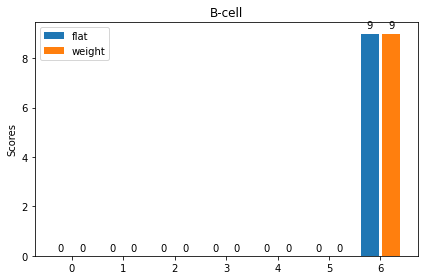

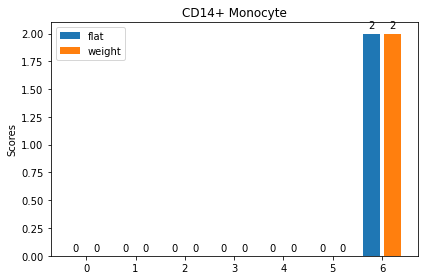

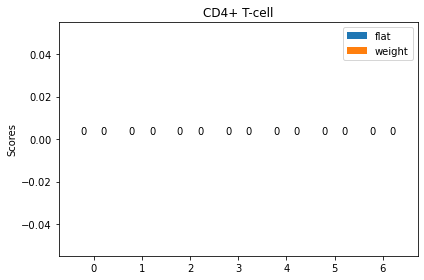

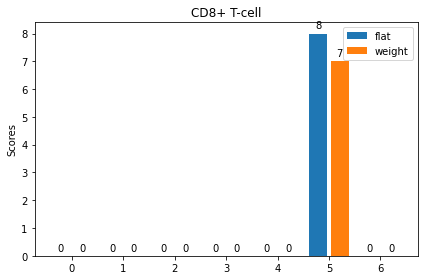

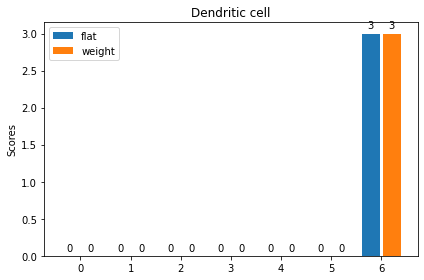

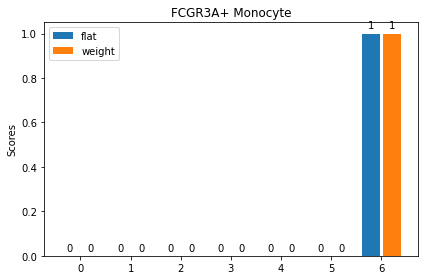

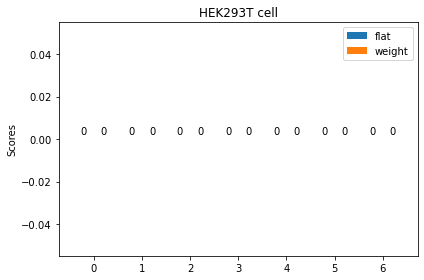

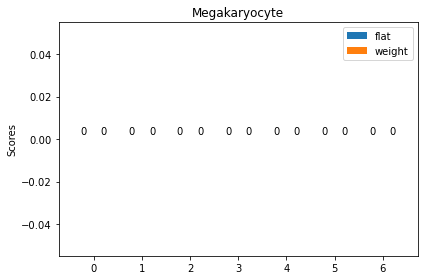

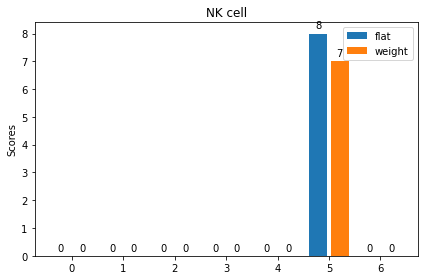

In [13]:
for celltype in range(len(markers.columns)):
    wm=[]
    fm=[]
    flat=0
    weight=0
    gene=[str(i) for i in markers.iloc[:,celltype]]
    for i in adata.obs['nsbm_level_2'].cat.categories:
        high_exp=[d for d in unw_flat_l2[i]['scores'] if d>1]
        for j in range(len(high_exp)):
            if unw_flat_l2[i]['gene_names'][j] in gene:
                flat=flat+1
        fm.append(flat)
        flat=0
        high_exp=[d for d in unw_weighted_l2[i]['scores'] if d>1]
        for s in range(len(high_exp)):
            if unw_weighted_l2[i]['gene_names'][s] in gene:
                weight=weight+1
        wm.append(weight)
        weight=0
    labels = adata.obs['nsbm_level_2'].cat.categories
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.6*width, fm, width, label='flat')
    rects2 = ax.bar(x + 0.6*width, wm, width, label='weight')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'{markers.columns[celltype]}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()
